# TOPIC: Walmart Weekly Sales Prediction

# Introduction

Walmart is one of the leading retail stores in the US. They use data to drive their day to day business objective. The following dataset that has been used in this project lists about the weekly sales at Walmart with respect to other conditions that might effect the weekly sales. I found this dataset particularly interesting because of the practical nature of the problem. 

# Business Problem 

Walmart, would like to predict the sales and demand accurately so that they can be prepared with the right stocks and other arrangements to maximise on the sales. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times.
Walmart runs several promotional markdown events throughout the year mainly preceding prominent holidays.
The objective of this project is to derive valuable information out of the data like which holidays and events are likely to impact on sales, understanding the effects of external factors like fuel price, temperature, unemployment on sales. And ultimate objective isto predict the Weekly Sales amount using machine learning models and deploy the models on a test data which will drive the decision making at Walmart. 

## Importing the necessary libraries 

In [373]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [374]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
import association_metrics as am
from dython.nominal import associations
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [375]:
df_train=pd.read_csv('Train_S.csv')
df_test=pd.read_csv('Test_S.csv')
df_final=pd.read_csv('Test_S.csv')

# Data Understanding 

In [376]:
pd.set_option('display.max_rows', None)

In [377]:
df_train.head(100)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
5,1,6,2010-02-05,5749.03,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
6,1,7,2010-02-05,21084.08,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
7,1,8,2010-02-05,40129.01,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
8,1,9,2010-02-05,16930.99,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
9,1,10,2010-02-05,30721.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [378]:
df_test.head()

,Store,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315


In [379]:
df_train.shape

(421570, 17)

In [380]:
df_test.shape

(115064, 16)

In [381]:
df_train.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday_x          2
Temperature       3528
Fuel_Price         892
MarkDown1         2277
MarkDown2         1499
MarkDown3         1662
MarkDown4         1944
MarkDown5         2293
CPI               2145
Unemployment       349
IsHoliday_y          2
Type                 3
Size                40
dtype: int64

In [382]:
df_test.nunique()

Store             45
Dept              81
Date              39
IsHoliday_x        2
Temperature     1236
Fuel_Price       297
MarkDown1       1752
MarkDown2       1257
MarkDown3       1421
MarkDown4       1483
MarkDown5       1754
CPI              360
Unemployment      89
IsHoliday_y        2
Type               3
Size              40
dtype: int64

In [383]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [384]:
#I am checking some of the unique values of the columns to understand the nature of the datan 
print(df_train['Store'].unique())
print(df_train['Type'].unique())
print(df_train['CPI'].unique())
print(df_train['Size'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
['A' 'B' 'C']
[211.0963582 211.2421698 211.2891429 ... 214.6772833 214.7212488
 214.7415392]
[151315 202307  37392 205863  34875 202505  70713 155078 125833 126512
 207499 112238 219622 200898 123737  57197  93188 120653 203819 203742
 140167 119557 114533 128107 152513 204184 206302  93638  42988 203750
 203007  39690 158114 103681  39910 184109 155083 196321  41062 118221]


# Data Preparation

In [385]:
sum_val = sum(1 for _, row in df_train.iterrows() if row['IsHoliday_x']==row['IsHoliday_y'])

In [386]:
sum_val 

421570

#### Since the value of sum which itterates when the column values are equal is equals to the number of rows in our dataframe we can say that the column 'IsHoliday_x' and 'IsHoliday_y' are exactly same. We can drop one of the above mentioned columns.

In [387]:
df_train.drop('IsHoliday_y',axis=1,inplace=True)

In [388]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [389]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday_x   115064 non-null  bool   
 4   Temperature   115064 non-null  float64
 5   Fuel_Price    115064 non-null  float64
 6   MarkDown1     114915 non-null  float64
 7   MarkDown2     86437 non-null   float64
 8   MarkDown3     105235 non-null  float64
 9   MarkDown4     102176 non-null  float64
 10  MarkDown5     115064 non-null  float64
 11  CPI           76902 non-null   float64
 12  Unemployment  76902 non-null   float64
 13  IsHoliday_y   115064 non-null  bool   
 14  Type          115064 non-null  object 
 15  Size          115064 non-null  int64  
dtypes: bool(2), float64(9), int64(3), object(2)
memory usage: 12.5+ MB


#### We can see that df_test also has the exact same problem. So we will drop the column 'IsHoliday_y' from df_test as well.

In [390]:
df_test.drop('IsHoliday_y',axis=1,inplace=True)

In [391]:
df_val=df_train['Weekly_Sales'].values

In [392]:
df_val

array([24924.5 , 50605.27, 13740.12, ..., 56017.47,  6817.48,  1076.8 ])

In [393]:
negative_Sales=sum(n<0 for n in df_val)

In [394]:
negative_Sales

1285

#### As we can see there are 1285 negative values of Weekly Sales. It is not possible, so we have to rectify it by choosing Weekly Sales values >=0 

In [395]:
df_train=df_train[df_train['Weekly_Sales']>=0]

### Handling Missing Values

In [396]:
df_train.isnull().mean()*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday_x      0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.262346
MarkDown2       73.608861
MarkDown3       67.482304
MarkDown4       67.989579
MarkDown5       64.084371
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

#### There are missing values in the Markdown columns only. Since Markdown features represents a rare event when superstores give discounts and give away it is possible that the NaN represents those days when these discounts were not there. Therefore I am imputing these missing values with 0 representing no special Markdown. 

In [397]:
MarkDown_cols=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
for i in MarkDown_cols:
    df_train[i]=df_train[i].replace(np.nan,0)

In [398]:
df_train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [399]:
df_test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday_x         0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
dtype: int64

In [400]:
for i in MarkDown_cols:
    df_test[i]=df_test[i].replace(np.nan,0)

In [401]:
df_test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday_x         0
Temperature         0
Fuel_Price          0
MarkDown1           0
MarkDown2           0
MarkDown3           0
MarkDown4           0
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
dtype: int64

In [402]:
df_test.isnull().sum()/len(df_test)

Store           0.000000
Dept            0.000000
Date            0.000000
IsHoliday_x     0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.000000
MarkDown2       0.000000
MarkDown3       0.000000
MarkDown4       0.000000
MarkDown5       0.000000
CPI             0.331659
Unemployment    0.331659
Type            0.000000
Size            0.000000
dtype: float64

#### The missing values are significant in the test data set as they contain 33% of the data, therefore they need to be imputed. But first we will check if they are significant at all for our model.

# EDA

<Axes: xlabel='IsHoliday_x', ylabel='Weekly_Sales'>

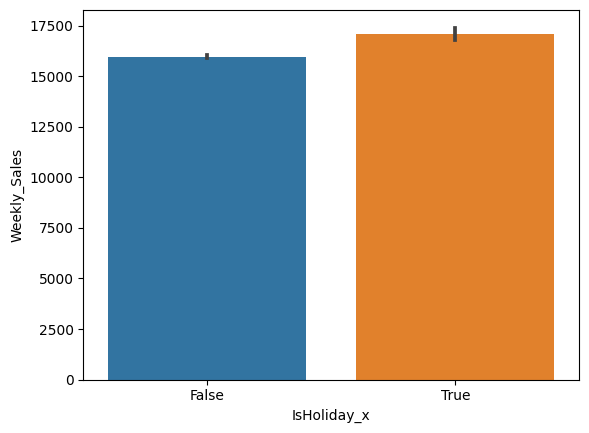

In [403]:
sns.barplot(df_train,x='IsHoliday_x',y='Weekly_Sales')

#### We can See that that the sum of weekly sales is greater when there is holiday. Hence holidays will significantly influence our predicted future Weekly Sales

In [404]:
df_holiday=df_train.loc[df_train['IsHoliday_x']==True]

In [405]:
df_holiday['Date'].unique() 

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

#### We can see that the holidays in a year are of four unique types that happen in four different months. So we can categories these holidays and look for their individual effects on Weekly Sales.

In [406]:
df_train.loc[(df_train['Date']=='2010-02-12')|(df_train['Date']=='2011-02-11')|(df_train['Date']=='2012-02-10'),'Holiday_Feb']= True
df_train.loc[(df_train['Date']!='2010-02-12')&(df_train['Date']!='2011-02-11')&(df_train['Date']!='2012-02-10'),'Holiday_Feb']= False
df_train.loc[(df_train['Date']=='2010-09-10')|(df_train['Date']=='2011-09-09')|(df_train['Date']=='2012-09-07'),'Holiday_Sep']= True
df_train.loc[(df_train['Date']!='2010-09-10')&(df_train['Date']!='2011-09-09')&(df_train['Date']!='2012-09-07'),'Holiday_Sep']= False
df_train.loc[(df_train['Date']=='2010-11-26')|(df_train['Date']=='2011-11-25'),'Holiday_Nov']= True
df_train.loc[(df_train['Date']!='2010-11-26')&(df_train['Date']!='2011-11-25'),'Holiday_Nov']= False
df_train.loc[(df_train['Date']=='2010-12-31')|(df_train['Date']=='2011-12-30'),'Holiday_Dec']= True
df_train.loc[(df_train['Date']!='2010-12-31')&(df_train['Date']!='2011-12-30'),'Holiday_Dec']= False

<Axes: xlabel='Holiday_Feb', ylabel='Weekly_Sales'>

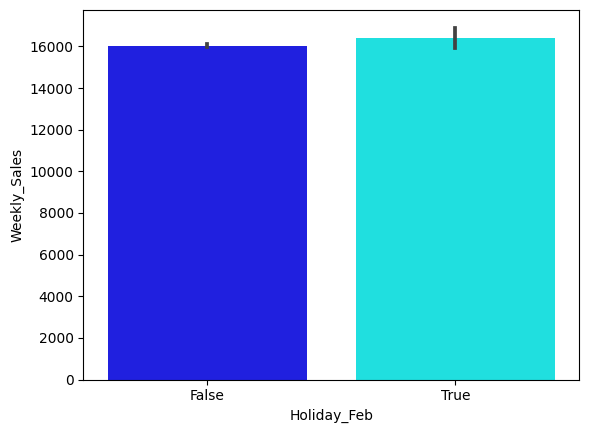

In [407]:
sns.barplot(df_train,x='Holiday_Feb',y='Weekly_Sales',palette=['blue','cyan'])

<Axes: xlabel='Holiday_Sep', ylabel='Weekly_Sales'>

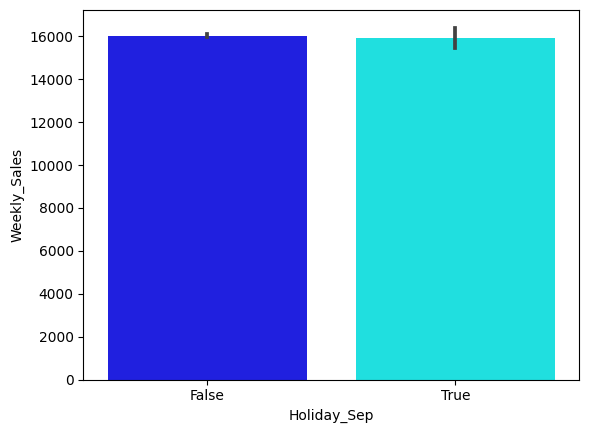

In [408]:
sns.barplot(df_train,x='Holiday_Sep',y='Weekly_Sales',palette=['blue','cyan'])

<Axes: xlabel='Holiday_Nov', ylabel='Weekly_Sales'>

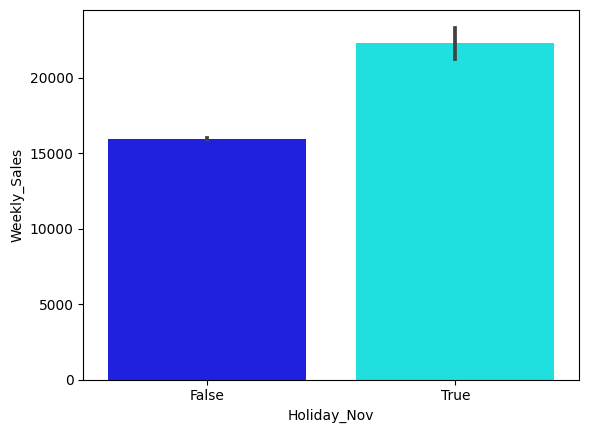

In [409]:
sns.barplot(df_train,x='Holiday_Nov',y='Weekly_Sales',palette=['blue','cyan'])

<Axes: xlabel='Holiday_Dec', ylabel='Weekly_Sales'>

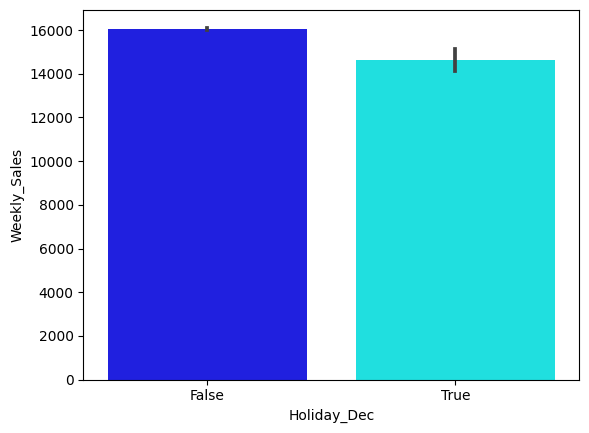

In [410]:
sns.barplot(df_train,x='Holiday_Dec',y='Weekly_Sales',palette=['blue','cyan'])

#### As we can see from the analysis of the holidays, Weekly Sales are relatively high during holidays of November compared to any other holiday months.

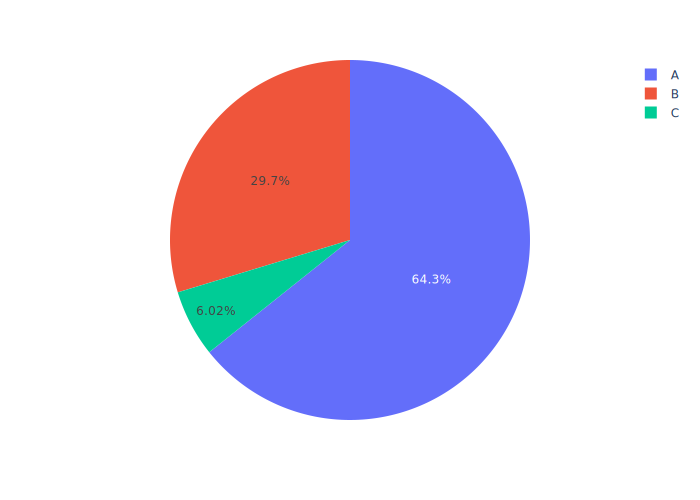

In [411]:
fig=px.pie(df_train,names='Type',values='Weekly_Sales')
fig.show('svg')

In [412]:
df1=df_train.groupby(['Type','Holiday_Feb'])['Weekly_Sales'].mean().reset_index()

In [413]:
df1

,Type,Holiday_Feb,Weekly_Sales
0,A,False,20134.993683
1,A,True,20612.757674
2,B,False,12284.349447
3,B,True,12463.412421
4,C,False,9534.047011
5,C,True,10179.271884


In [414]:
print(df1.columns)

Index(['Type', 'Holiday_Feb', 'Weekly_Sales'], dtype='object')


<Axes: xlabel='Type', ylabel='Weekly_Sales'>

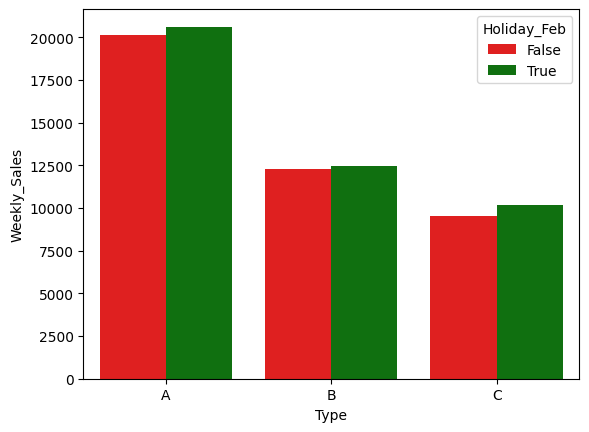

In [415]:
sns.barplot(df1,x='Type',y='Weekly_Sales',hue='Holiday_Feb',palette=['red','green'])

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

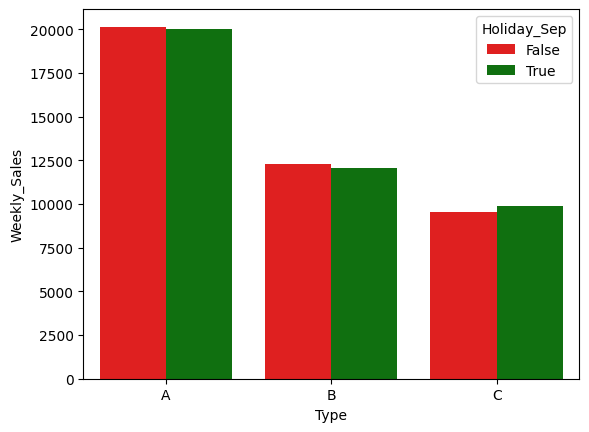

In [416]:
df2=df_train.groupby(['Type','Holiday_Sep'])['Weekly_Sales'].mean().reset_index()
sns.barplot(df2,x='Type',y='Weekly_Sales',hue='Holiday_Sep',palette=['red','green'])

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

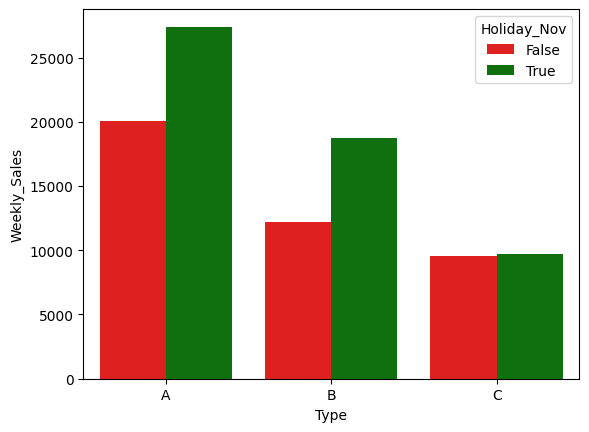

In [417]:
df3=df_train.groupby(['Type','Holiday_Nov'])['Weekly_Sales'].mean().reset_index()
sns.barplot(df3,x='Type',y='Weekly_Sales',hue='Holiday_Nov',palette=['red','green'])

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

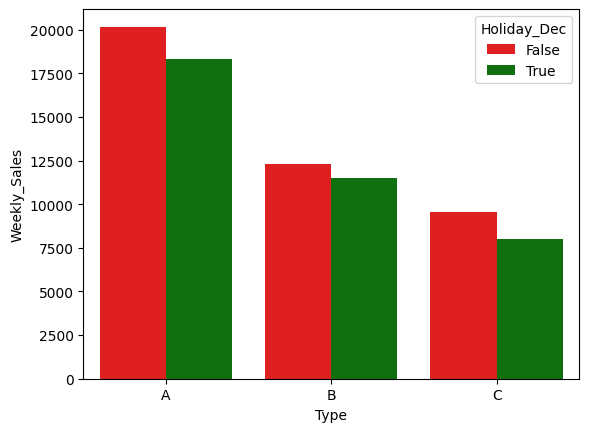

In [418]:
df4=df_train.groupby(['Type','Holiday_Dec'])['Weekly_Sales'].mean().reset_index()
sns.barplot(df4,x='Type',y='Weekly_Sales',hue='Holiday_Dec',palette=['red','green'])

#### Accross all the analysis of the weekly sales of store type with holiday above we can see that store A has been consistently generating higher revenue compared to rest of the stores during holidays.

In [419]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420285 non-null  int64  
 1   Dept          420285 non-null  int64  
 2   Date          420285 non-null  object 
 3   Weekly_Sales  420285 non-null  float64
 4   IsHoliday_x   420285 non-null  bool   
 5   Temperature   420285 non-null  float64
 6   Fuel_Price    420285 non-null  float64
 7   MarkDown1     420285 non-null  float64
 8   MarkDown2     420285 non-null  float64
 9   MarkDown3     420285 non-null  float64
 10  MarkDown4     420285 non-null  float64
 11  MarkDown5     420285 non-null  float64
 12  CPI           420285 non-null  float64
 13  Unemployment  420285 non-null  float64
 14  Type          420285 non-null  object 
 15  Size          420285 non-null  int64  
 16  Holiday_Feb   420285 non-null  object 
 17  Holiday_Sep   420285 non-null  object 
 18  Holi

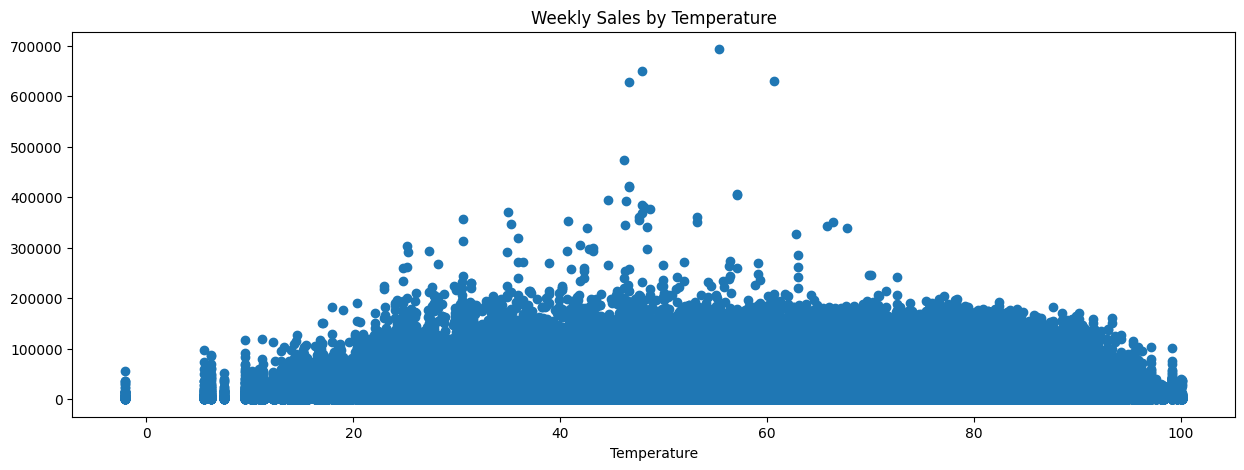

In [420]:
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Temperature')
plt.xlabel('Temperature')
plt.scatter(x=df_train['Temperature'],y=df_train['Weekly_Sales'])
plt.show()

#### No significant pattern can be seen for temperature vs weekly sales. ALl that can be concluded from this plot is that customers mostly prefer moderate temperatures 45-60 units for shopping.

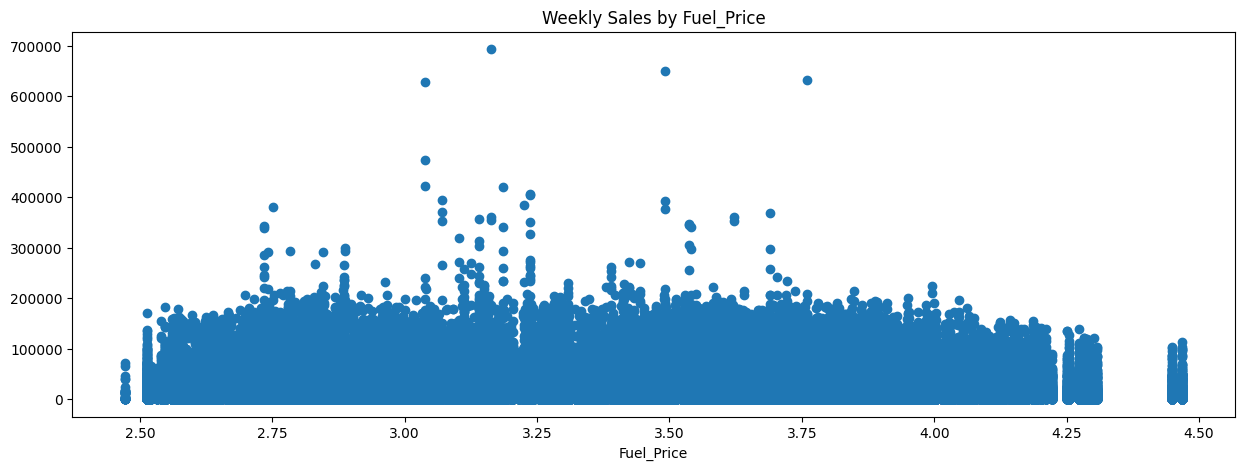

In [421]:
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Fuel_Price')
plt.xlabel('Fuel_Price')
plt.scatter(x=df_train['Fuel_Price'],y=df_train['Weekly_Sales'])
plt.show()

#### No significant observations for Weekly sales vs Fuel Price.

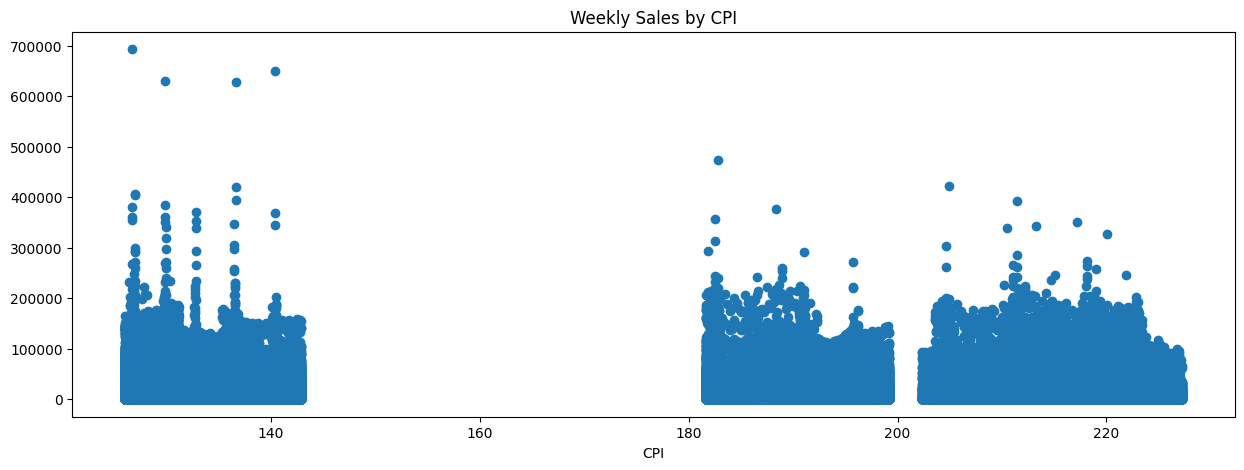

In [422]:
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by CPI')
plt.xlabel('CPI')
plt.scatter(x=df_train['CPI'],y=df_train['Weekly_Sales'])
plt.show()

### CPI means change in consumer price for a basket of goods over a base price with time. It denotes how much inflation has affected the prices of goods.

In [423]:
df6=df_train.copy()
df6['CPI']=df6['CPI']/10

<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

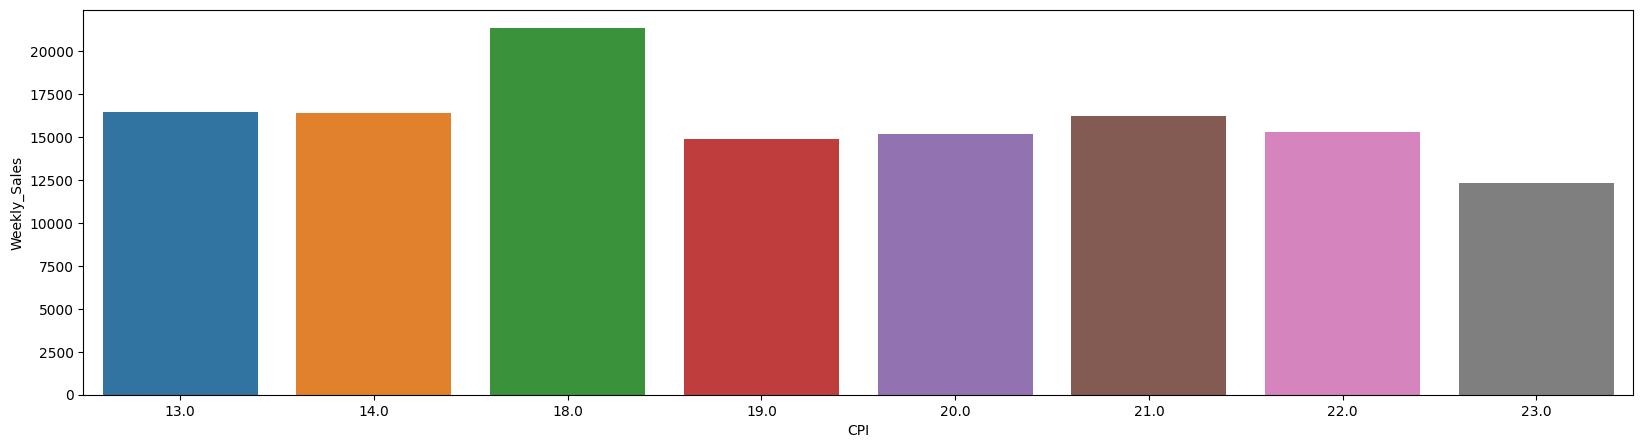

In [424]:
plt.figure(figsize=(20,5))
df5=df_train.groupby(df6['CPI'].round())['Weekly_Sales'].mean().reset_index()
sns.barplot(x=df5['CPI'],y=df5['Weekly_Sales'])

#### I have converted the continuous values of CPI by rounding off to 10s digit i.e. 18 CPI actually means all values of CPI from 180 onwards upto and not including 190.

#### It can be concluded that change in CPI did not influence weekly sales on an average but relatively CPI within range 180-190 showed higher Weekly Sales. 

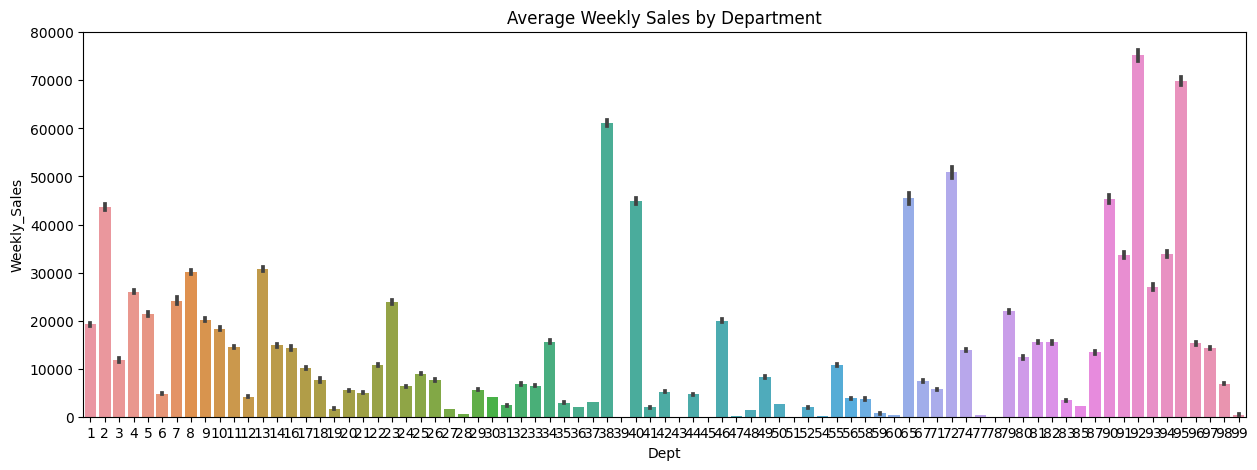

In [425]:
plt.figure(figsize=(15,5))
plt.title('Average Weekly Sales by Department')
plt.xlabel('Departments')
sns.barplot(x=df_train['Dept'],y=df_train['Weekly_Sales'])
plt.show()

#### For Weekly Sales by department it was seen that some departmentslike 38,40, 65 and 72 showed high sale value but on an average sales is higher for departments labelled more than 90. 

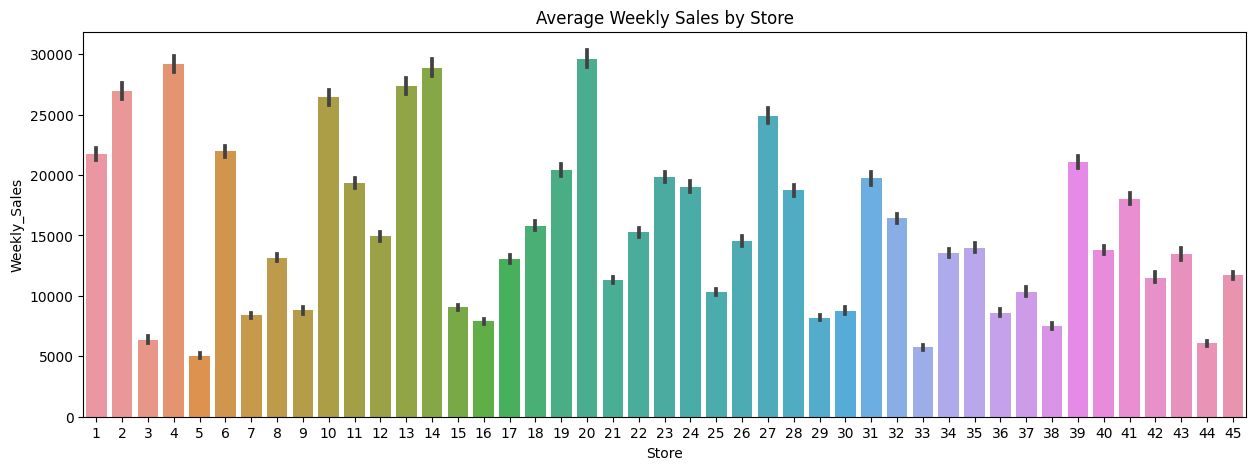

In [426]:
plt.figure(figsize=(15,5))
plt.title('Average Weekly Sales by Store')
plt.xlabel('Store')
sns.barplot(x=df_train['Store'],y=df_train['Weekly_Sales'])
plt.show()

#### Above plot shows that which stores are showing better performance and which stores need improvement. This insights can be valueable for the management.

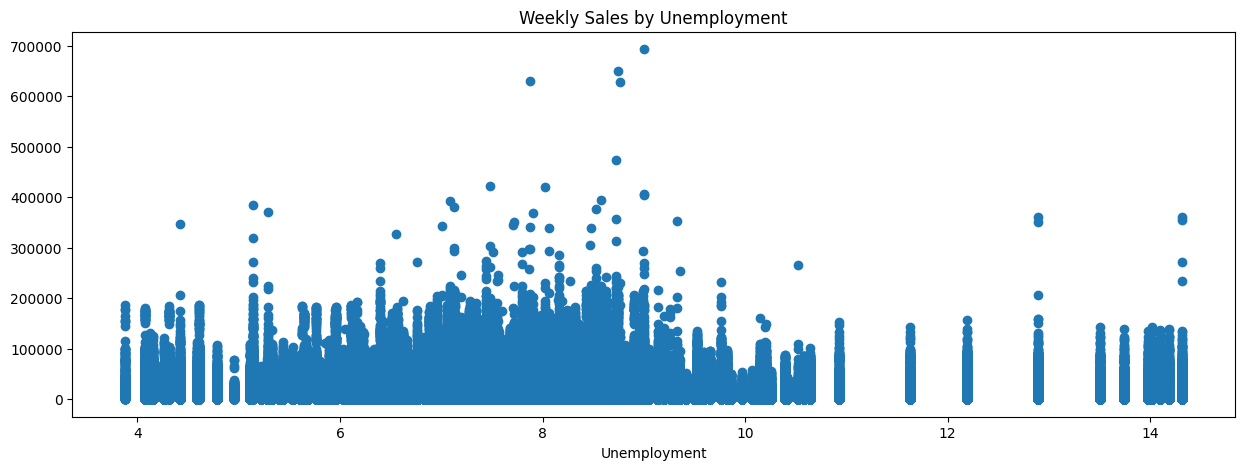

In [427]:
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Unemployment')
plt.xlabel('Unemployment')
plt.scatter(x=df_train['Unemployment'],y=df_train['Weekly_Sales'])
plt.show()

<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

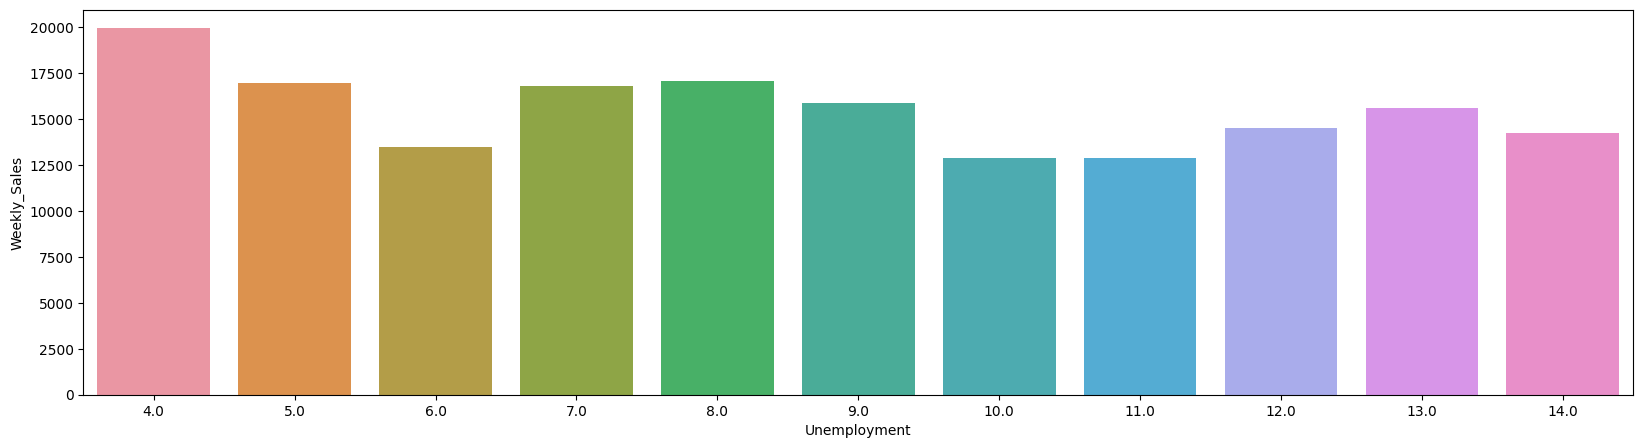

In [428]:
plt.figure(figsize=(20,5))
df7=df_train.groupby(df_train['Unemployment'].round())['Weekly_Sales'].mean().reset_index()
sns.barplot(x=df7['Unemployment'],y=df7['Weekly_Sales'])

#### Lower unemployment rate of 4.0 has got the highest average weekly sales but on an average the weekly sales is not showing any relation with unemployment rate. 

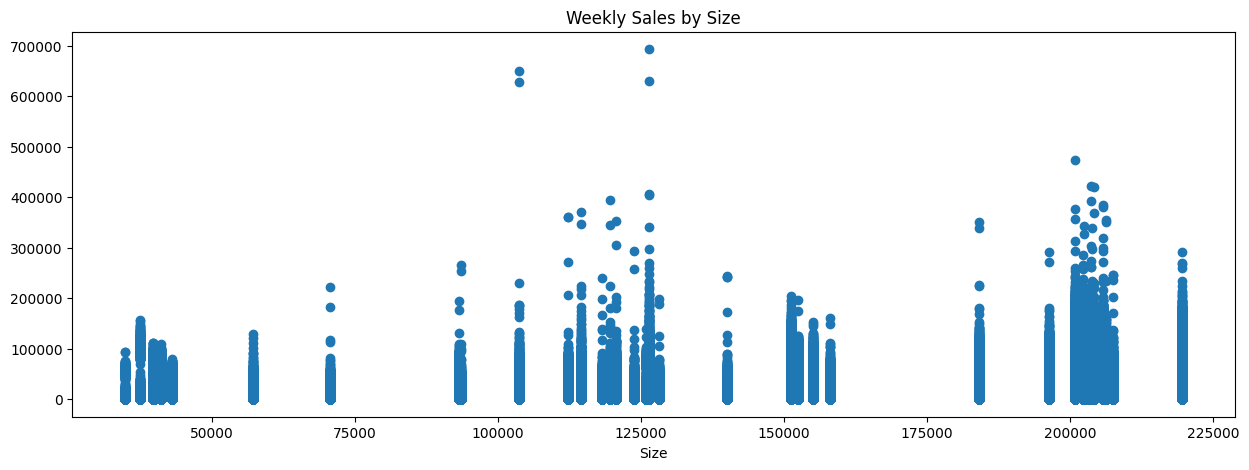

In [429]:
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Size')
plt.xlabel('Size')
plt.scatter(x=df_train['Size'],y=df_train['Weekly_Sales'])
plt.show()

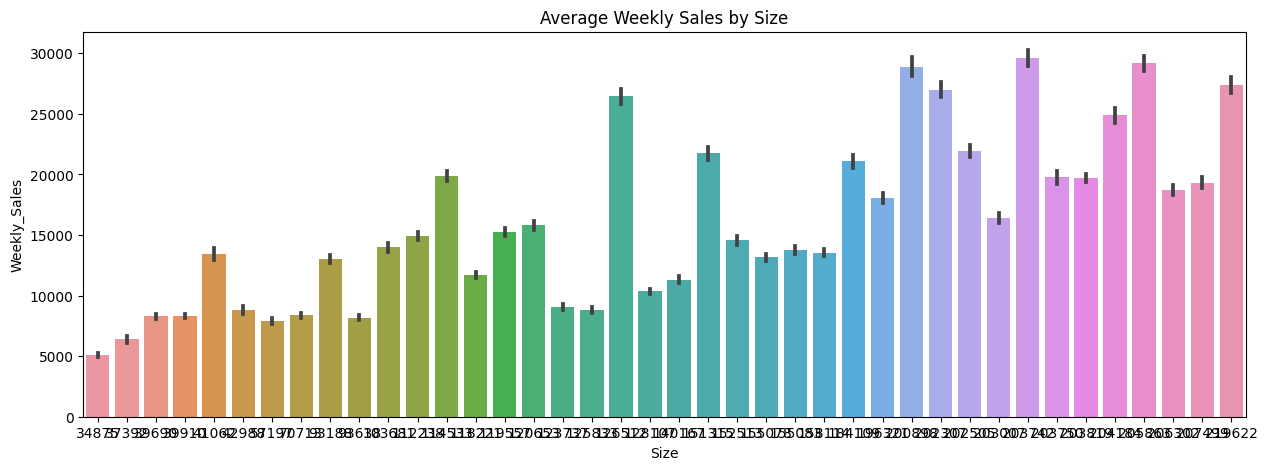

In [430]:
plt.figure(figsize=(15,5))
plt.title('Average Weekly Sales by Size')
plt.xlabel('Size')
sns.barplot(x=df_train['Size'],y=df_train['Weekly_Sales'])
plt.show()

#### Average weekly sales are increasing with store size. 

## Checking for outliers

<Axes: xlabel='Weekly_Sales'>

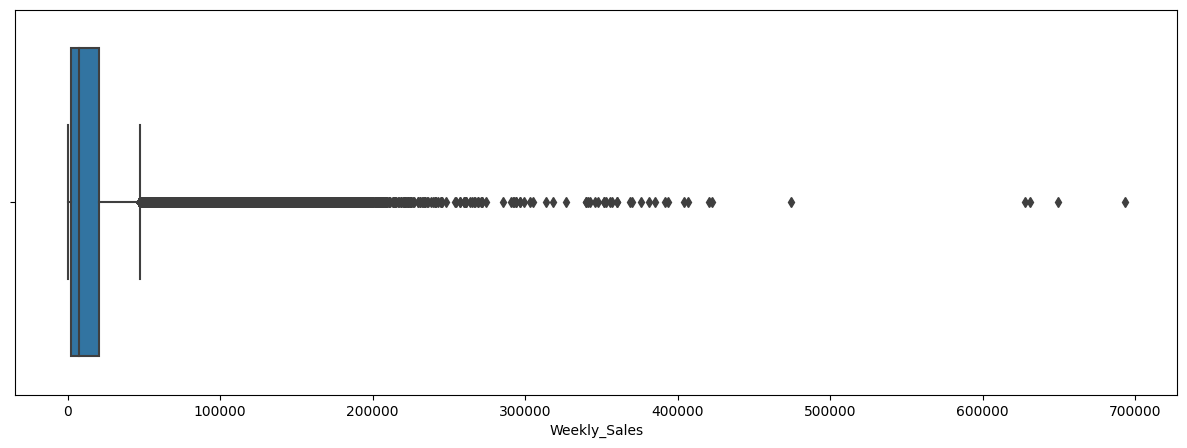

In [431]:
plt.figure(figsize=(15,5))
sns.boxplot(df_train,x='Weekly_Sales')

In [432]:
sorted_df = df_train.sort_values(by=['Weekly_Sales'], ascending=False)
sorted_df.head(20)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Holiday_Feb,Holiday_Sep,Holiday_Nov,Holiday_Dec
90645,10,72,2010-11-26,693099.36,True,55.33,3.162,0.00,0.00,0.00,0.00,0.00,126.669267,9.003,B,126512,False,False,True,False
337053,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,0.00,58563.24,20.97,6386.86,140.421786,8.745,B,103681,False,False,True,False
94393,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.00,141630.61,79.00,1009.98,129.836400,7.874,B,126512,False,False,True,False
333594,35,72,2010-11-26,627962.93,True,46.67,3.039,0.00,0.00,0.00,0.00,0.00,136.689571,8.763,B,103681,False,False,True,False
131088,14,72,2010-11-26,474330.10,True,46.15,3.039,0.00,0.00,0.00,0.00,0.00,182.783277,8.724,A,200898,False,False,True,False
190370,20,72,2010-11-26,422306.25,True,46.66,3.039,0.00,0.00,0.00,0.00,0.00,204.962100,7.484,A,203742,False,False,True,False
259799,27,72,2010-11-26,420586.57,True,46.67,3.186,0.00,0.00,0.00,0.00,0.00,136.689571,8.021,A,204184,False,False,True,False
90886,10,7,2010-12-24,406988.63,False,57.06,3.236,0.00,0.00,0.00,0.00,0.00,126.983581,9.003,B,126512,False,False,False,False
90936,10,72,2010-12-24,404245.03,False,57.06,3.236,0.00,0.00,0.00,0.00,0.00,126.983581,9.003,B,126512,False,False,False,False
210037,22,72,2010-11-26,393705.20,True,44.61,3.070,0.00,0.00,0.00,0.00,0.00,136.689571,8.572,B,119557,False,False,True,False


## Feature Engineering

In [433]:
df_train.corr()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,1.000000,0.024236,-0.085099,-0.000511,-0.050226,0.065296,-0.059948,-0.033727,-0.020299,-0.042792,-0.012595,-0.211240,0.208753,-0.182784
Dept,0.024236,1.000000,0.148704,0.000662,0.004718,0.003543,0.001444,0.000428,0.001514,0.001872,0.002754,-0.007172,0.007785,-0.002471
Weekly_Sales,-0.085099,0.148704,1.000000,0.012856,-0.002333,0.000092,0.047260,0.020961,0.038530,0.037481,0.050612,-0.021153,-0.025831,0.244089
IsHoliday_x,-0.000511,0.000662,0.012856,1.000000,-0.155779,-0.078140,-0.003522,0.207314,0.266718,0.011621,-0.015189,-0.001946,0.010540,0.000786
Temperature,-0.050226,0.004718,-0.002333,-0.155779,1.000000,0.143718,-0.026426,-0.179669,-0.056010,-0.050310,-0.014836,0.182191,0.096792,-0.058414
Fuel_Price,0.065296,0.003543,0.000092,-0.078140,0.143718,1.000000,0.297084,0.029288,0.018645,0.166654,0.215597,-0.164207,-0.033897,0.003620
MarkDown1,-0.059948,0.001444,0.047260,-0.003522,-0.026426,0.297084,1.000000,0.175019,-0.014422,0.838862,0.415287,0.010927,-0.105259,0.169876
MarkDown2,-0.033727,0.000428,0.020961,0.207314,-0.179669,0.029288,0.175019,1.000000,-0.006088,0.113458,0.131853,-0.003685,-0.041504,0.078387
MarkDown3,-0.020299,0.001514,0.038530,0.266718,-0.056010,0.018645,-0.014422,-0.006088,1.000000,-0.012029,0.042544,-0.005958,-0.018080,0.033670
MarkDown4,-0.042792,0.001872,0.037481,0.011621,-0.050310,0.166654,0.838862,0.113458,-0.012029,1.000000,0.303553,-0.002050,-0.076589,0.127411


<Axes: >

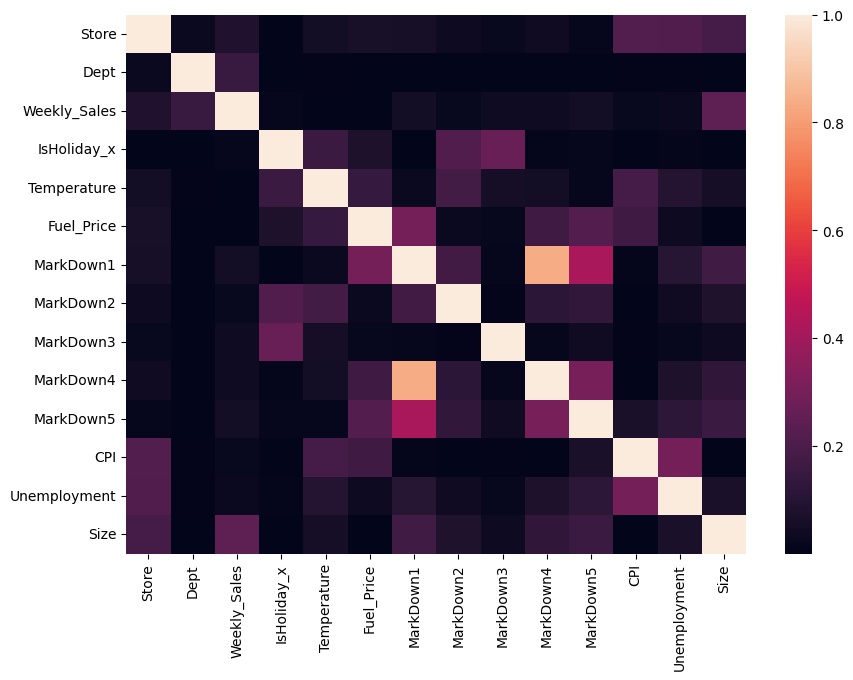

In [434]:
plt.figure(figsize=(10,7))
sns.heatmap(df_train.corr().abs())

### In the correlation plot we can see that the dependent variable weekly sales is highly correlated with store, department and size of the store. Markdown 1 is highly correlated with markdown 4 and 5. So we can drop them and just keep markdown 1, otherwise it will create multicollinearity problem. CPI and Unemploment are highly correlated with store and they do not have much correlation with Weekly sales. Also temperature and fuel price are showing no correlation with weekly sales. So we can drop these columns.

In [435]:
drop_col=['Temperature','Fuel_Price','MarkDown4','MarkDown5','CPI','Unemployment']

In [436]:
df_reduced=df_train.drop(drop_col,axis=1)
df_reduced.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,MarkDown1,MarkDown2,MarkDown3,Type,Size,Holiday_Feb,Holiday_Sep,Holiday_Nov,Holiday_Dec
0,1,1,2010-02-05,24924.50,False,0.0,0.0,0.0,A,151315,False,False,False,False
1,1,2,2010-02-05,50605.27,False,0.0,0.0,0.0,A,151315,False,False,False,False
2,1,3,2010-02-05,13740.12,False,0.0,0.0,0.0,A,151315,False,False,False,False
3,1,4,2010-02-05,39954.04,False,0.0,0.0,0.0,A,151315,False,False,False,False
4,1,5,2010-02-05,32229.38,False,0.0,0.0,0.0,A,151315,False,False,False,False


<Axes: >

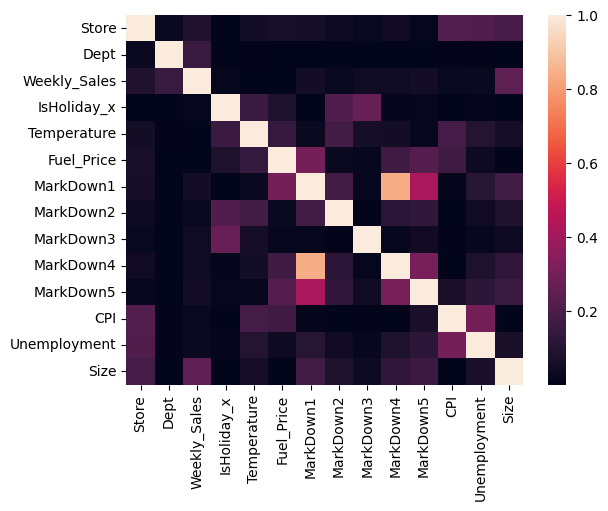

In [437]:
sns.heatmap(df_train.corr().abs())

In [438]:
categorical_col=df_train.select_dtypes(exclude=np.number).columns.tolist()
categorical_col

['Date',
 'IsHoliday_x',
 'Type',
 'Holiday_Feb',
 'Holiday_Sep',
 'Holiday_Nov',
 'Holiday_Dec']

C:\Users\dutta\anaconda3\lib\site-packages\dython\nominal.py:298: RuntimeWarning:

Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.



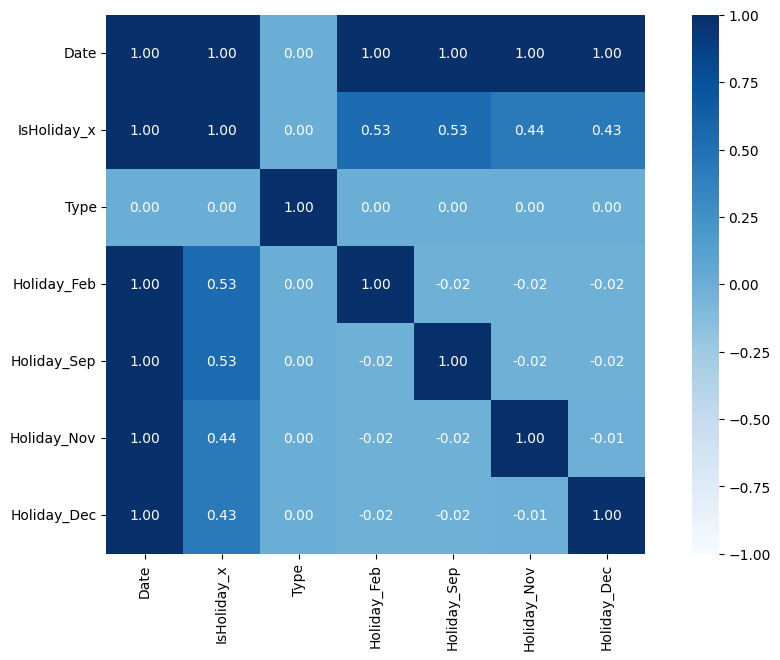

In [439]:
fig, ax = plt.subplots(figsize = (12, 7))
cramers_v=associations(df_train[categorical_col], nom_nom_assoc='cramer',ax=ax,cmap='Blues')

#### As we can see the date column is correlated with the holidays, but the date is not in the date time data type format, so we can convert date to date time and extract the month and year from the date. Also IsHoliday_x column can be dropped as its is correlated with the Holiday columns.

In [440]:
df_train['Date']=pd.to_datetime(df_train['Date'])

In [441]:
df_reduced['Date']=pd.to_datetime(df_reduced['Date'])

In [442]:
df_reduced['Month']=df_reduced['Date'].dt.month

In [443]:
df_reduced['Year']=df_reduced['Date'].dt.year

<Axes: >

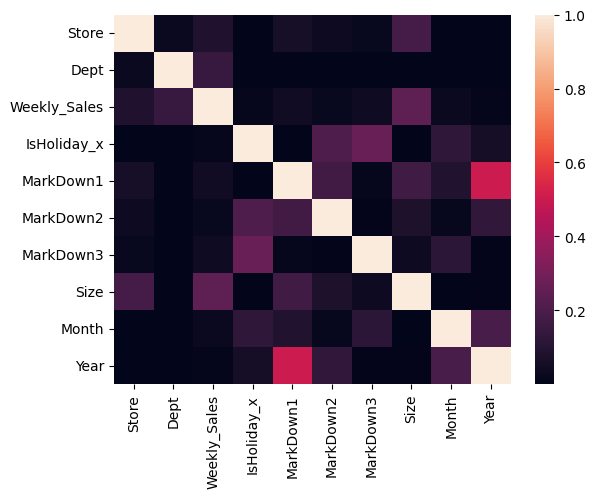

In [444]:
sns.heatmap(df_reduced.corr().abs())

In [445]:
#### Dropping the Year column as it is correlated with MarkDown1

In [446]:
df_reduced.drop('Year',axis=1,inplace=True)

In [447]:
df_reduced.drop('IsHoliday_x',axis=1,inplace=True)

In [448]:
df_reduced.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'Type', 'Size', 'Holiday_Feb', 'Holiday_Sep',
       'Holiday_Nov', 'Holiday_Dec', 'Month'],
      dtype='object')

In [449]:
cat_col=df_reduced.select_dtypes(exclude=np.number).columns.tolist()
num_col=df_reduced.select_dtypes(include=np.number).columns.tolist()

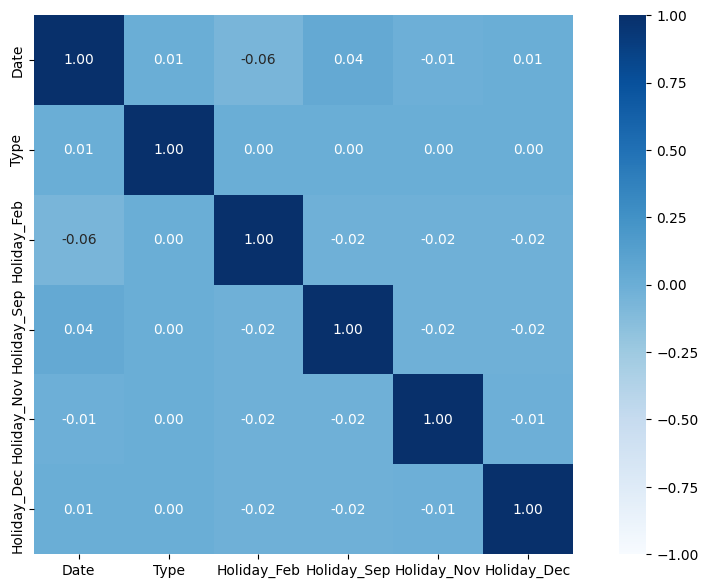

In [450]:
fig, ax = plt.subplots(figsize = (12, 7))
cramers_v=associations(df_reduced[cat_col], nom_nom_assoc='cramer',ax=ax,cmap='Blues')

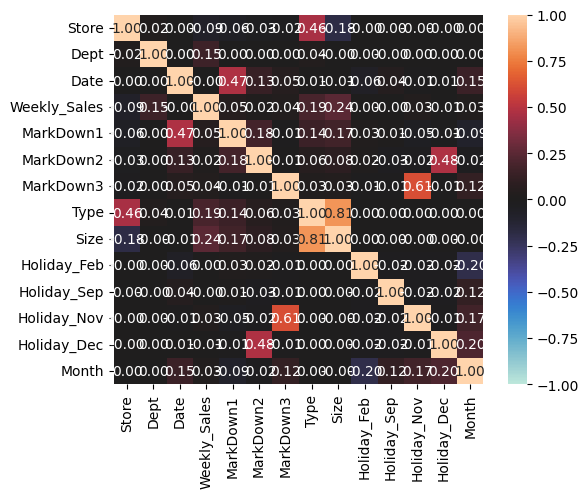

{'corr':                  Store      Dept      Date  Weekly_Sales  MarkDown1  \
 Store         1.000000  0.024236  0.003167     -0.085099  -0.059948   
 Dept          0.024236  1.000000  0.003987      0.148704   0.001444   
 Date          0.003167  0.003987  1.000000     -0.000549   0.470870   
 Weekly_Sales -0.085099  0.148704 -0.000549      1.000000   0.047260   
 MarkDown1    -0.059948  0.001444  0.470870      0.047260   1.000000   
 MarkDown2    -0.033727  0.000428  0.128048      0.020961   0.175019   
 MarkDown3    -0.020299  0.001514  0.048788      0.038530  -0.014422   
 Type          0.455323  0.037464  0.005234      0.188388   0.142313   
 Size         -0.182784 -0.002471 -0.005146      0.244089   0.169876   
 Holiday_Feb  -0.000771  0.000547 -0.063763      0.002498   0.029578   
 Holiday_Sep   0.000225 -0.000262  0.042596     -0.000632   0.009926   
 Holiday_Nov  -0.000237  0.000898 -0.008156      0.032885  -0.045454   
 Holiday_Dec  -0.000206  0.000188  0.006009     -0.00734

In [451]:
associations(df_reduced, nominal_columns='auto', numerical_columns='auto', mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson')

### From the association heatmap we can see that variables that are associated with our target variable weekly sales are dept, type and size.  

## Encoding Features 

In [452]:
df_reduced.head()

,Store,Dept,Date,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,Type,Size,Holiday_Feb,Holiday_Sep,Holiday_Nov,Holiday_Dec,Month
0,1,1,2010-02-05,24924.50,0.0,0.0,0.0,A,151315,False,False,False,False,2
1,1,2,2010-02-05,50605.27,0.0,0.0,0.0,A,151315,False,False,False,False,2
2,1,3,2010-02-05,13740.12,0.0,0.0,0.0,A,151315,False,False,False,False,2
3,1,4,2010-02-05,39954.04,0.0,0.0,0.0,A,151315,False,False,False,False,2
4,1,5,2010-02-05,32229.38,0.0,0.0,0.0,A,151315,False,False,False,False,2


In [453]:
type_num={'A':1,'B':2,'C':3}
df_enc=df_reduced.copy()
df_enc['Type']=df_reduced['Type'].replace(type_num)

In [454]:
df_enc['Holiday_Feb']=df_reduced['Holiday_Feb'].astype(bool).astype(int)

In [455]:
df_enc['Holiday_Sep']=df_reduced['Holiday_Sep'].astype(bool).astype(int)

In [456]:
df_enc['Holiday_Nov']=df_reduced['Holiday_Nov'].astype(bool).astype(int)

In [457]:
df_enc['Holiday_Dec']=df_reduced['Holiday_Dec'].astype(bool).astype(int)

In [458]:
df_enc.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    358786
MarkDown1         2278
MarkDown2         1499
MarkDown3         1662
Type                 3
Size                40
Holiday_Feb          2
Holiday_Sep          2
Holiday_Nov          2
Holiday_Dec          2
Month               12
dtype: int64

In [459]:
df_enc.drop('Date',axis=1,inplace=True)

### Checking VIF for multicollinearity

In [460]:
vif=[]
df_value=df_enc.values
df_value

array([[1.000000e+00, 1.000000e+00, 2.492450e+04, ..., 0.000000e+00,
        0.000000e+00, 2.000000e+00],
       [1.000000e+00, 2.000000e+00, 5.060527e+04, ..., 0.000000e+00,
        0.000000e+00, 2.000000e+00],
       [1.000000e+00, 3.000000e+00, 1.374012e+04, ..., 0.000000e+00,
        0.000000e+00, 2.000000e+00],
       ...,
       [4.500000e+01, 9.500000e+01, 5.601747e+04, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+01],
       [4.500000e+01, 9.700000e+01, 6.817480e+03, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+01],
       [4.500000e+01, 9.800000e+01, 1.076800e+03, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+01]])

In [461]:
for i in range(df_value.shape[1]):
    vif.append(variance_inflation_factor(df_value[:,0:],i))

In [462]:
pd.DataFrame({'vif':vif},index=df_enc.columns)

,vif
Store,4.162877
Dept,3.082458
Weekly_Sales,1.638464
MarkDown1,1.274600
MarkDown2,1.416078
MarkDown3,1.622018
Type,5.258171
Size,4.635078
Holiday_Feb,1.060765
Holiday_Sep,1.039006


### All the VIFs are in the satisfactory range of <10 and shows no signs of multicollinearity. Hence we can keep all of the features.

#### Checking Distribution of Data

C:\Users\dutta\AppData\Local\Temp\ipykernel_19436\4147728488.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Weekly_Sales', ylabel='Density'>

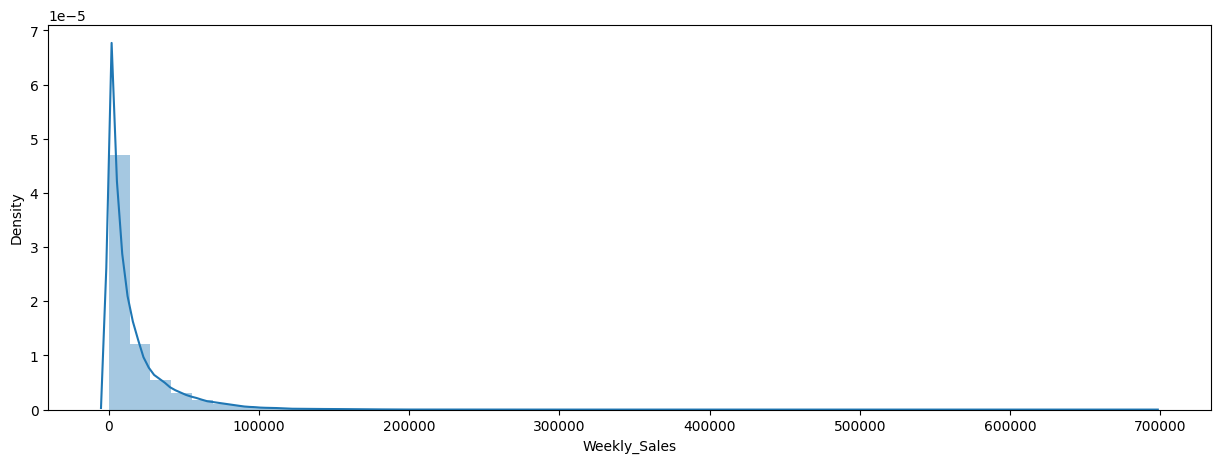

In [463]:
plt.figure(figsize=(15,5))
plt.subplot()
sns.distplot(df_enc['Weekly_Sales'])

# Modelling & Evaluation

In [464]:
X=df_enc.drop('Weekly_Sales',axis=1).values
Y=df_enc['Weekly_Sales'].values

In [465]:
X_fimp=df_enc.drop('Weekly_Sales',axis=1)

In [466]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size = 0.25,random_state=0)

### Multiple Linear Regression

#### Linear Regression with Ordinary Least Squares

In [467]:
regr_ols=sm.OLS(y_train,X_train)
ols_res=regr_ols.fit()
print(ols_res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.389
Model:                            OLS   Adj. R-squared (uncentered):              0.389
Method:                 Least Squares   F-statistic:                          1.675e+04
Date:                Fri, 23 Jun 2023   Prob (F-statistic):                        0.00
Time:                        01:47:18   Log-Likelihood:                     -3.5951e+06
No. Observations:              315213   AIC:                                  7.190e+06
Df Residuals:                  315201   BIC:                                  7.190e+06
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [468]:
y_predOLS=ols_res.predict(X_test)

In [469]:
metrics.r2_score(y_test,y_predOLS)

0.08737775735921482

### Linear Regression with SKlearn

In [470]:
regr=LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [471]:
y_pred = regr.predict(X_test)

In [472]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.0884441577168883

In [473]:
RMSE=mean_squared_error(y_test, y_pred,squared=False)
RMSE

21711.822330587835

In [474]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr, X_train, y_train, scoring='r2', cv=8)
scores 

array([0.08909004, 0.0817517 , 0.08805849, 0.08534172, 0.08986574,
       0.08452324, 0.08445372, 0.08821372])

#### We will try out regularization techniques to get better result out of Linear regression. 

## Ridge Regression

In [475]:
ridge=Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [476]:
y_pred_r=ridge.predict(X_test)

In [477]:
r2_r = metrics.r2_score(y_test, y_pred_r)
r2_r

0.08844410793659352

In [478]:
RMSE_r=mean_squared_error(y_test, y_pred_r,squared=False)
RMSE_r

21711.822923431875

## Lasso Regression

In [479]:
lasso=Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [480]:
y_pred_l=lasso.predict(X_test)

In [481]:
r2_l = metrics.r2_score(y_test, y_pred_l)
r2_l

0.08843924818844573

In [483]:
RMSE_Ls=mean_squared_error(y_test, y_pred_l,squared=False)
RMSE_Ls

21711.880799120863

### Decision Tree

In [484]:
d_tree = tree.DecisionTreeRegressor()

In [485]:
d_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [486]:
d_tree.get_depth()

39

In [487]:
y_pred_d=d_tree.predict(X_test)

In [488]:
r2_d = metrics.r2_score(y_test, y_pred_d)
r2_d

0.9415680028458745

In [489]:
y_train2=d_tree.predict(X_train)

In [490]:
metrics.r2_score(y_train,y_train2)

0.9859394373757462

In [491]:
RMSLE_d=mean_squared_log_error(y_test, y_pred_d,squared=False)
RMSLE_d

0.46537603918657294

## Ensemble Models

### Random Forest

In [492]:
forest=RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

<Axes: >

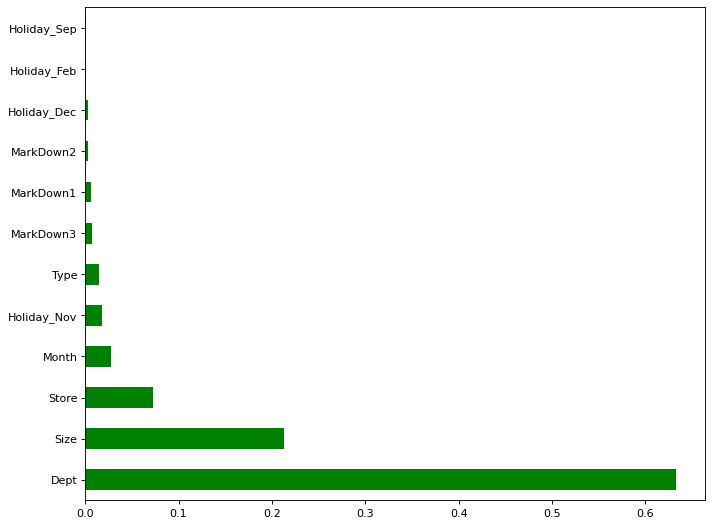

In [493]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(forest.feature_importances_, index= X_fimp.columns)

feat_importances.nlargest(12).plot(kind='barh',color='g')

### According to feature importance we can drop Holiday_Feb and Holiday_Sep from the training features as they are not contributing much as input features.

In [494]:
Y_pred=forest.predict(X_test)

In [495]:
forest.score(X_test, y_test)

0.9580334965533517

In [496]:
RMSE=mean_squared_error(y_test, Y_pred,squared=False)
RMSE

4658.606520112587

## Trying out with the important features

In [497]:
train_imp=df_enc[['Dept','Size','Store','Month','Holiday_Nov','Holiday_Dec','Type','MarkDown1','MarkDown2','MarkDown3','Weekly_Sales']]

In [498]:
train_imp.head()

,Dept,Size,Store,Month,Holiday_Nov,Holiday_Dec,Type,MarkDown1,MarkDown2,MarkDown3,Weekly_Sales
0,1,151315,1,2,0,0,1,0.0,0.0,0.0,24924.50
1,2,151315,1,2,0,0,1,0.0,0.0,0.0,50605.27
2,3,151315,1,2,0,0,1,0.0,0.0,0.0,13740.12
3,4,151315,1,2,0,0,1,0.0,0.0,0.0,39954.04
4,5,151315,1,2,0,0,1,0.0,0.0,0.0,32229.38


In [499]:
X_n=train_imp.drop('Weekly_Sales',axis=1).values

In [500]:
Y_n=train_imp['Weekly_Sales'].values

In [501]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_n,Y_n,test_size = 0.25,random_state=0)

In [502]:
forest2=RandomForestRegressor()

In [503]:
forest2.fit(X_train1,y_train1)

RandomForestRegressor()

In [504]:
Y_pred1=forest2.predict(X_test1)

In [505]:
forest2.score(X_test1, y_test1)

0.9576146408796417

In [506]:
RMSE_imp=mean_squared_error(y_test, Y_pred1,squared=False)
RMSE_imp

4681.796909564178

## Deployment

In [507]:
df_test.head()

,Store,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


In [508]:
df_test['Date']=pd.to_datetime(df_test['Date'])

In [509]:
df_test['Month']=df_test['Date'].dt.month

In [510]:
df_test.loc[(df_test['Date']=='2010-02-12')|(df_test['Date']=='2011-02-11')|(df_test['Date']=='2012-02-10'),'Holiday_Feb']= True
df_test.loc[(df_test['Date']!='2010-02-12')&(df_test['Date']!='2011-02-11')&(df_test['Date']!='2012-02-10'),'Holiday_Feb']= False
df_test.loc[(df_test['Date']=='2010-09-10')|(df_test['Date']=='2011-09-09')|(df_test['Date']=='2012-09-07'),'Holiday_Sep']= True
df_test.loc[(df_test['Date']!='2010-09-10')&(df_test['Date']!='2011-09-09')&(df_test['Date']!='2012-09-07'),'Holiday_Sep']= False
df_test.loc[(df_test['Date']=='2010-11-26')|(df_test['Date']=='2011-11-25'),'Holiday_Nov']= True
df_test.loc[(df_test['Date']!='2010-11-26')&(df_test['Date']!='2011-11-25'),'Holiday_Nov']= False
df_test.loc[(df_test['Date']=='2010-12-31')|(df_test['Date']=='2011-12-30'),'Holiday_Dec']= True
df_test.loc[(df_test['Date']!='2010-12-31')&(df_test['Date']!='2011-12-30'),'Holiday_Dec']= False

In [511]:
df_test.head()

,Store,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Holiday_Feb,Holiday_Sep,Holiday_Nov,Holiday_Dec
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,11,False,False,False,False
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,11,False,False,False,False
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,11,False,False,False,False
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,11,False,False,False,False
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,11,False,False,False,False


In [512]:
#type_num={'A':1,'B':2,'C':3}
df_test['Type']=df_test['Type'].replace(type_num)

In [513]:
df_test['Holiday_']=df_test['Holiday_Nov'].astype(bool).astype(int)
df_test['Holiday_Nov']=df_test['Holiday_Nov'].astype(bool).astype(int)
df_test['Holiday_Nov']=df_test['Holiday_Nov'].astype(bool).astype(int)

In [514]:
df_test['Holiday_Nov']=df_test['Holiday_Nov'].astype(bool).astype(int)

In [515]:
df_z=train_imp.drop('Weekly_Sales',axis=1)

In [516]:
test_n=df_test[df_z.columns]

In [517]:
test_n.head()

,Dept,Size,Store,Month,Holiday_Nov,Holiday_Dec,Type,MarkDown1,MarkDown2,MarkDown3
0,1,151315,1,11,0,False,1,6766.44,5147.7,50.82
1,2,151315,1,11,0,False,1,6766.44,5147.7,50.82
2,3,151315,1,11,0,False,1,6766.44,5147.7,50.82
3,4,151315,1,11,0,False,1,6766.44,5147.7,50.82
4,5,151315,1,11,0,False,1,6766.44,5147.7,50.82


In [518]:
test_x=test_n.values

In [519]:
prediction=forest2.predict(test_x)

In [520]:
prediction

array([19530.857975  , 44395.96092143, 10492.5116    , ...,
       56798.5941554 ,  6332.9527031 ,   712.90693182])

In [521]:
df_pred=pd.DataFrame(prediction,columns=['Predicted_Weekly_Sales'])

In [522]:
df_final=pd.concat([df_final,df_pred],axis=1)

In [523]:
df_final.head(100)

,Store,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Predicted_Weekly_Sales
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315,19530.857975
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315,44395.960921
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315,10492.511600
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315,37685.667390
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315,26788.608081
5,1,6,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315,3387.252025
6,1,7,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315,22574.930833
7,1,8,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315,35209.209900
8,1,9,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315,35632.013983
9,1,10,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315,29360.723433
